#### Importing Relevant Libraries

In [66]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



### Data Load and Exploration

In [67]:
#Loading data into dataframe
df = pd.read_csv("social_marketing.csv")

#Actual data snapshot
display(df.head(10))

#Looking at the shape of data
print("Shape of the data is:",df.shape,"\n")

#Looking at data description
display(df.describe())

#Looking at data info
print("Data information:")
print(df.info())



,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
5,h6nvj91yp,6,4,2,7,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
6,ma7kfewxq,1,2,7,1,0,1,1,11,1,...,1,0,0,0,0,0,0,0,0,0
7,u48d61ztj,5,3,3,6,1,1,1,0,0,...,0,5,1,0,0,0,4,0,0,0
8,y2g68vhkf,6,2,0,1,0,0,0,0,2,...,0,5,0,0,1,12,3,1,0,0
9,n467yj1st,5,2,4,4,0,5,9,1,5,...,13,1,3,0,3,2,1,0,0,0


Shape of the data is: (7882, 37) 



,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.398757,1.526262,1.585004,2.696777,0.812992,1.070287,1.594012,1.788632,1.397488,0.863867,...,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336,0.006470,0.403324
std,3.529126,1.268890,2.285530,2.731510,0.935853,1.658783,2.160917,3.031113,1.775557,1.132562,...,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147,0.083288,1.813428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,20.000000,37.000000,16.000000,10.000000,...,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000,2.000000,26.000000


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7882 non-null   object
 1   chatter           7882 non-null   int64 
 2   current_events    7882 non-null   int64 
 3   travel            7882 non-null   int64 
 4   photo_sharing     7882 non-null   int64 
 5   uncategorized     7882 non-null   int64 
 6   tv_film           7882 non-null   int64 
 7   sports_fandom     7882 non-null   int64 
 8   politics          7882 non-null   int64 
 9   food              7882 non-null   int64 
 10  family            7882 non-null   int64 
 11  home_and_garden   7882 non-null   int64 
 12  music             7882 non-null   int64 
 13  news              7882 non-null   int64 
 14  online_gaming     7882 non-null   int64 
 15  shopping          7882 non-null   int64 
 16  health_nutrition  7882 non-null   int64 
 

<BarContainer object of 10 artists>

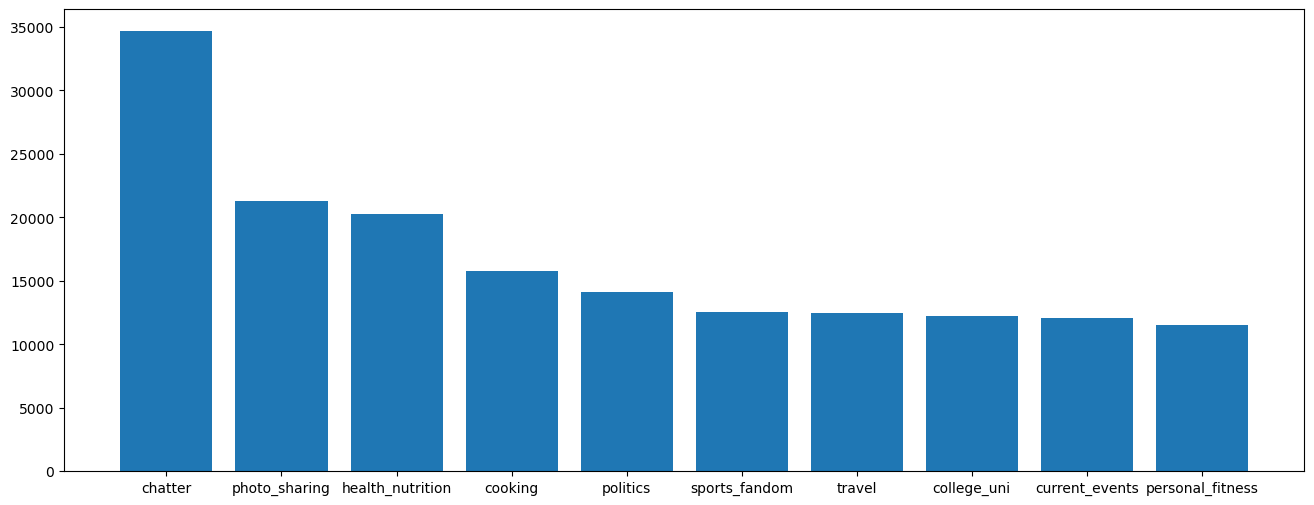

In [68]:
data = {}
for i in df.columns.drop('Unnamed: 0'):
    data[i] = df[i].sum()

data = pd.Series(data).to_frame().reset_index()
data.columns =['Tweet_Category','#Tweets']
data.sort_values(by ='#Tweets', ascending= False, inplace= True)
plt.figure(figsize=(16,6)) 
plt.bar(data['Tweet_Category'][:10], data['#Tweets'][:10])



### Data Preparation

In [69]:
df_X =df.drop(["Unnamed: 0"], axis= 1)
df_X

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
1,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
2,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,5,4,2,1,0,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
7878,9,3,2,4,0,1,0,4,1,3,...,0,1,0,1,0,5,0,1,0,0
7879,3,2,1,1,0,4,1,2,1,0,...,1,0,1,1,0,6,1,0,0,0
7880,3,2,0,4,0,0,1,1,1,1,...,0,0,1,0,0,1,1,0,1,12


### K-Means ++ without PCA

<Axes: >

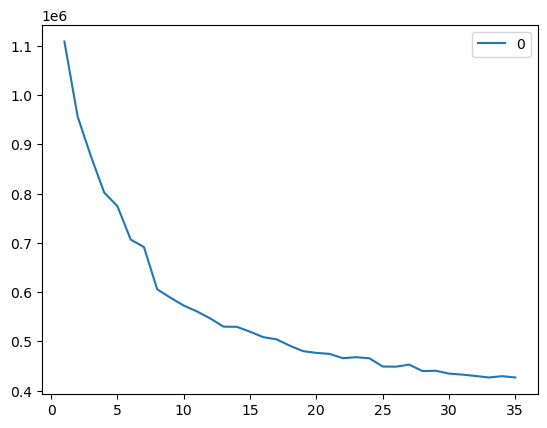

In [70]:
ssq_dis = {}

for i in range(1,36) :
 kmeans = KMeans(n_clusters=i,n_init='auto')
 kmeans.fit(df_X)
 ssq_dis[i] =kmeans.inertia_



pd.Series(ssq_dis).to_frame().plot()


#### No clear elbow point can be foud

### PCA and Kmeans++

,Variance,Cum_Sum
0,0.192387,0.192387
1,0.133621,0.326008
2,0.103810,0.429818
3,0.101257,0.531075
4,0.092553,0.623628
5,0.073461,0.697089
6,0.032390,0.729479
7,0.029230,0.758709
8,0.027566,0.786275
9,0.023625,0.809900


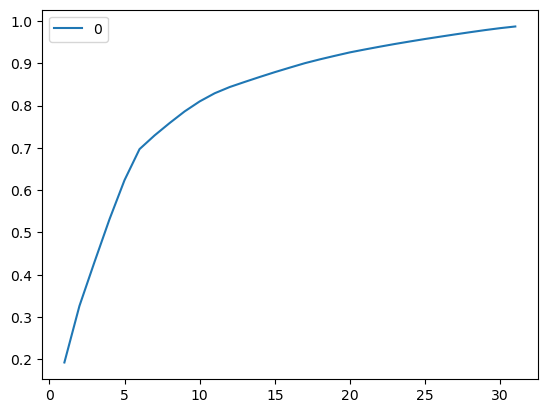

In [71]:
#Finding optimal PCs
dic ={}
for i in range(1,32):
    pca = PCA(n_components = i)
    df_X_PCA = pca.fit_transform(df_X)
    explained_variance = pca.explained_variance_ratio_
    dic[i] = explained_variance.sum()
pd.Series(dic).to_frame().plot()
explained_variance = pca.explained_variance_ratio_
variance_df =pd.DataFrame(explained_variance, columns= ['Variance'])
variance_df['Cum_Sum'] = np.cumsum(pca.explained_variance_ratio_)
variance_df

In [72]:
pca = PCA(n_components = 17)
df_X_PCA = pca.fit_transform(df_X)
df_X_PCA

array([[16.32445301, -7.16820588, -0.65912093, ...,  0.24358603,
        -1.75067603,  0.8634901 ],
       [-3.87057817, -2.17757338, -0.23000463, ...,  0.83851483,
         1.37961829, -1.6830001 ],
       [-2.45014968,  2.19410148, -0.29863963, ...,  0.61972298,
         1.23985092, -0.07122753],
       ...,
       [ 6.02193816, -3.72648345,  0.71994114, ..., -0.36301139,
        -0.28619165, -0.91436445],
       [-2.22899137, -0.97318116, -1.46685876, ..., -0.98104342,
         0.12958417, -0.60260796],
       [-1.0052894 , -2.66848734,  0.39073068, ..., -0.13954232,
         2.16237168, -1.1857699 ]])

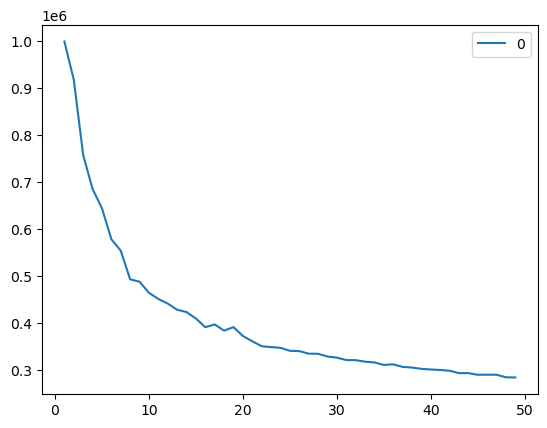

In [73]:
ssq_dis = {}

for i in range(1,50) :
 kmeans = KMeans(n_clusters=i,n_init='auto')
 kmeans.fit(df_X_PCA)
 ssq_dis[i] =kmeans.inertia_
pd.Series(ssq_dis).to_frame().plot()
plt.show()

In [74]:
# K Means++ - For wine color
kmeans = KMeans(n_clusters=13)
kmeans.init = "k-means++"
kmeans.fit(df_X_PCA)
kmean_clusters = kmeans.predict(df_X_PCA) 
kmean_clusters = pd.DataFrame(kmean_clusters,columns=["clusters"])
df =df.merge(kmean_clusters,how="inner",left_index=True, right_index=True)
df

c:\Users\naray\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,clusters
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,0,1,1,0,11,0,0,0,0,7
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,1,4,0,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,1,0,1,0,0,1,0,0,0,3
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,y3ijoqfgd,5,4,2,1,0,1,0,1,0,...,0,0,0,0,2,0,0,0,0,0
7878,n6gud4ext,9,3,2,4,0,1,0,4,1,...,1,0,1,0,5,0,1,0,0,2
7879,f71rt6cyg,3,2,1,1,0,4,1,2,1,...,0,1,1,0,6,1,0,0,0,10
7880,gevsyip7o,3,2,0,4,0,0,1,1,1,...,0,1,0,0,1,1,0,1,12,6


# Kmeans- Cluster Analysis

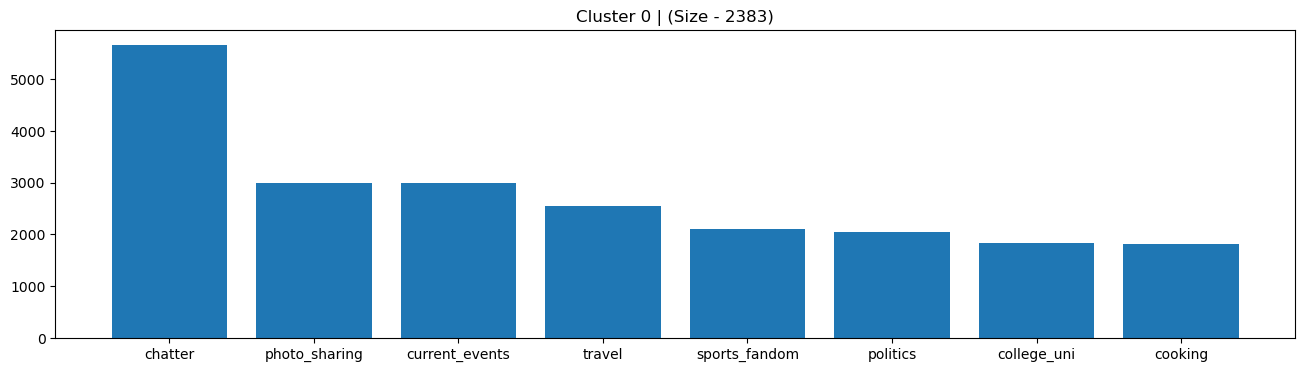

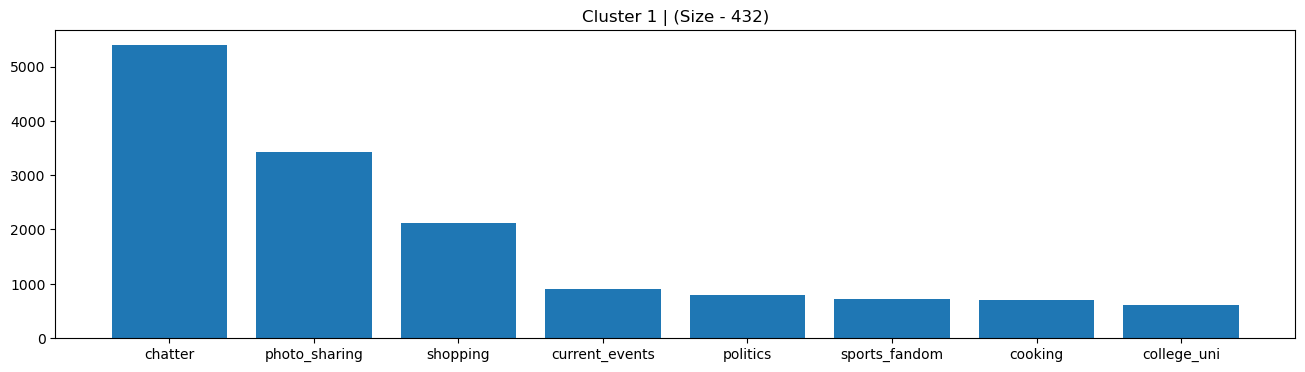

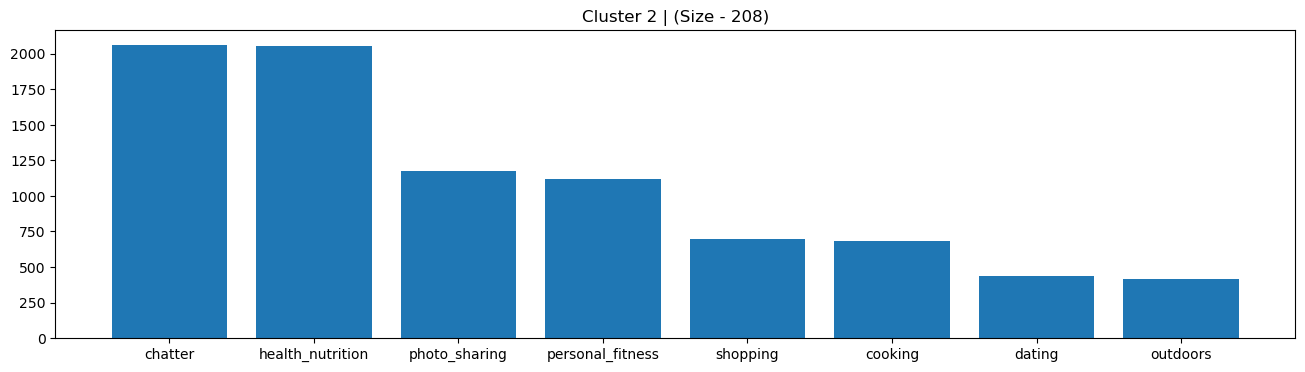

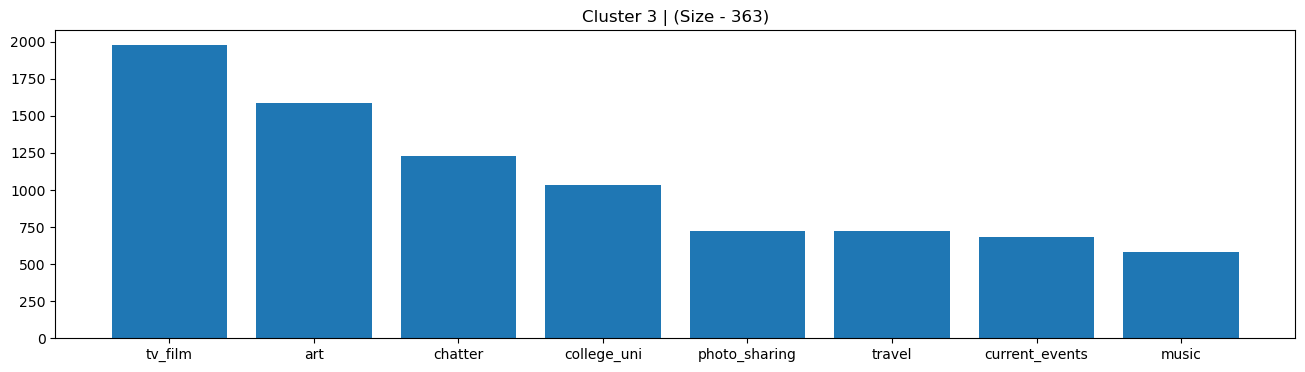

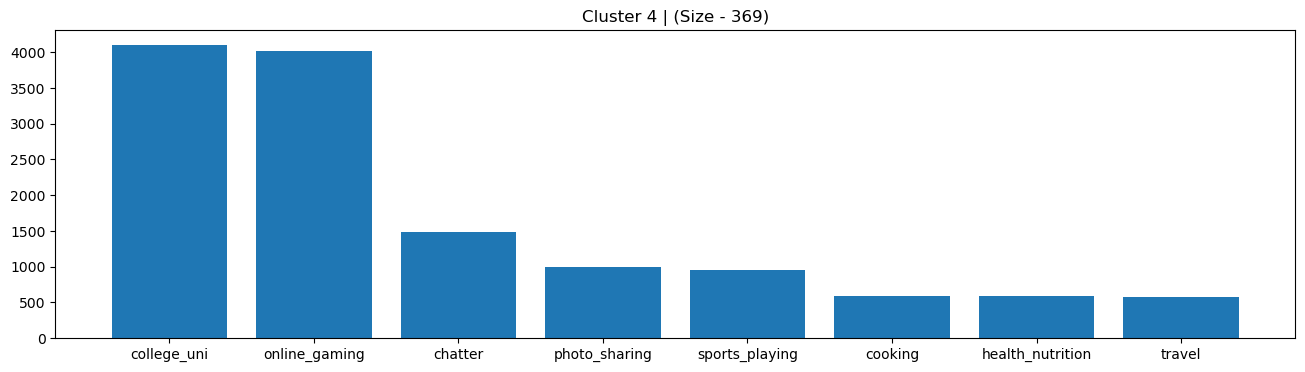

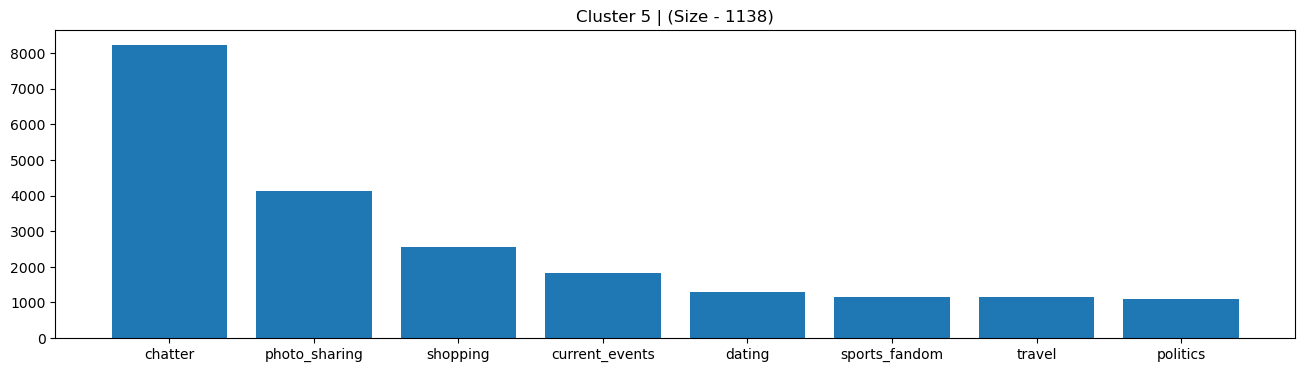

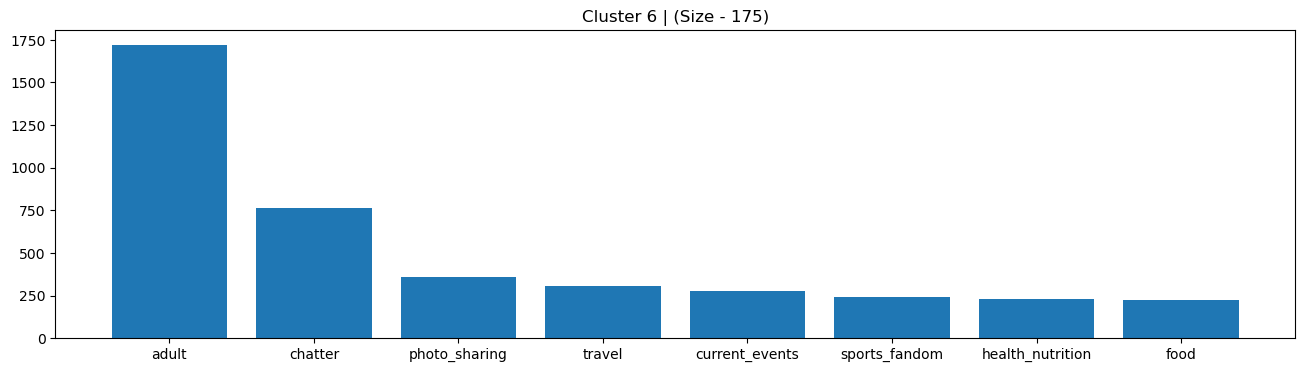

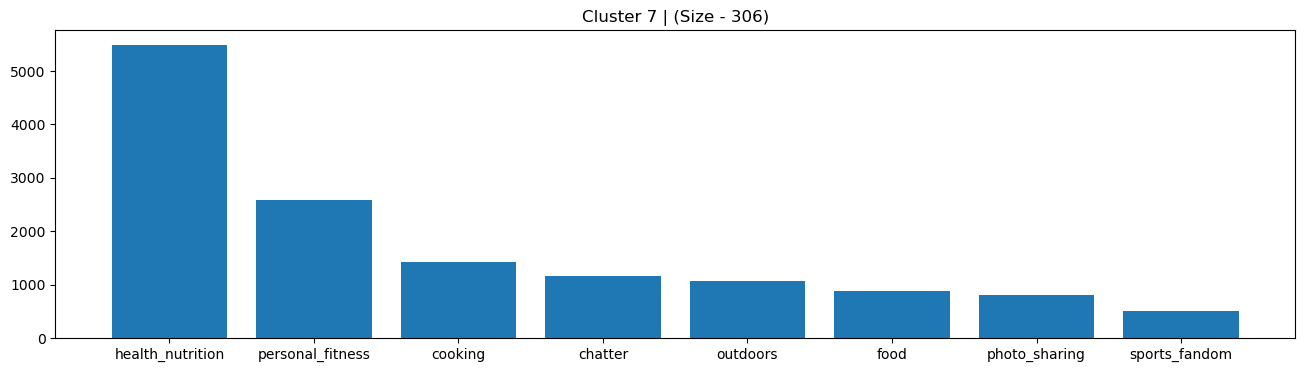

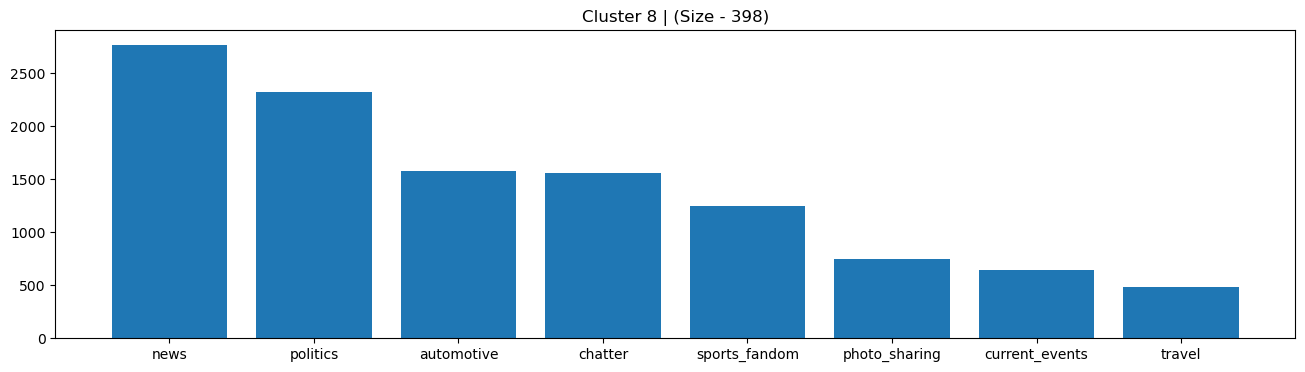

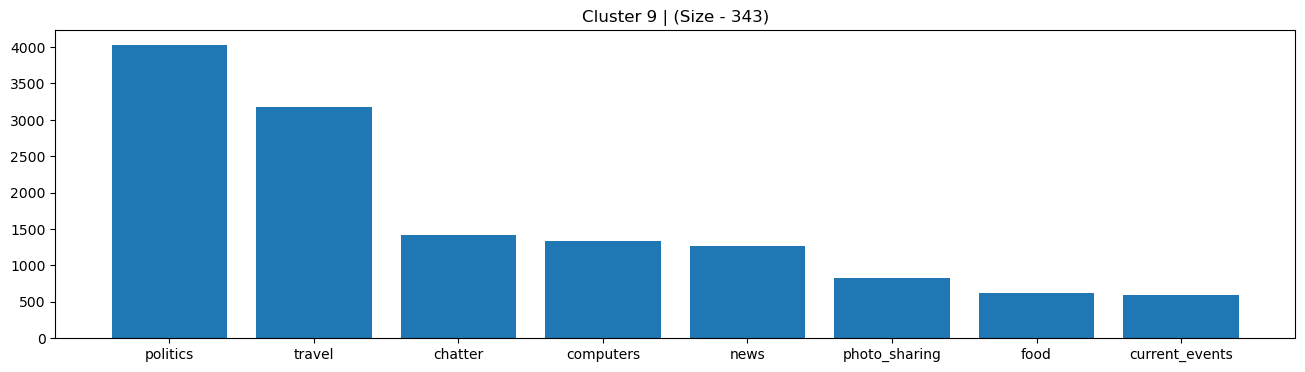

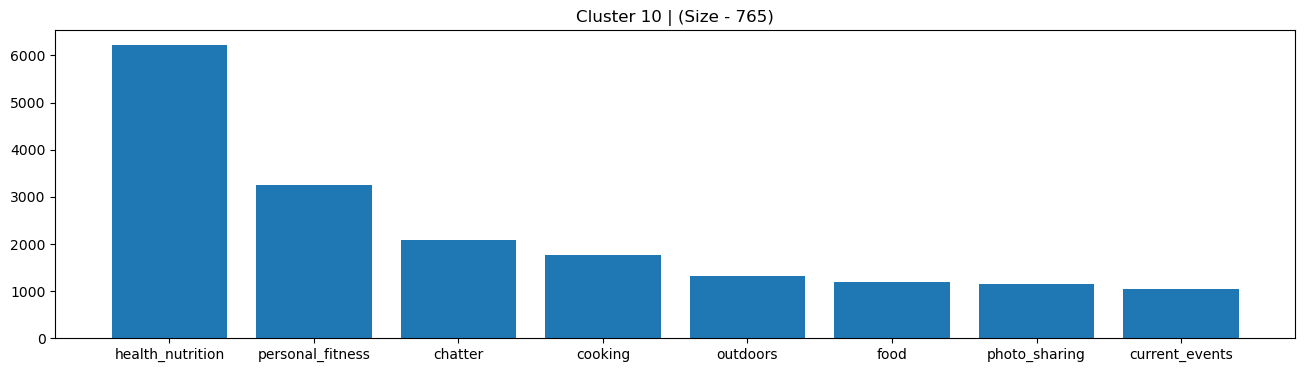

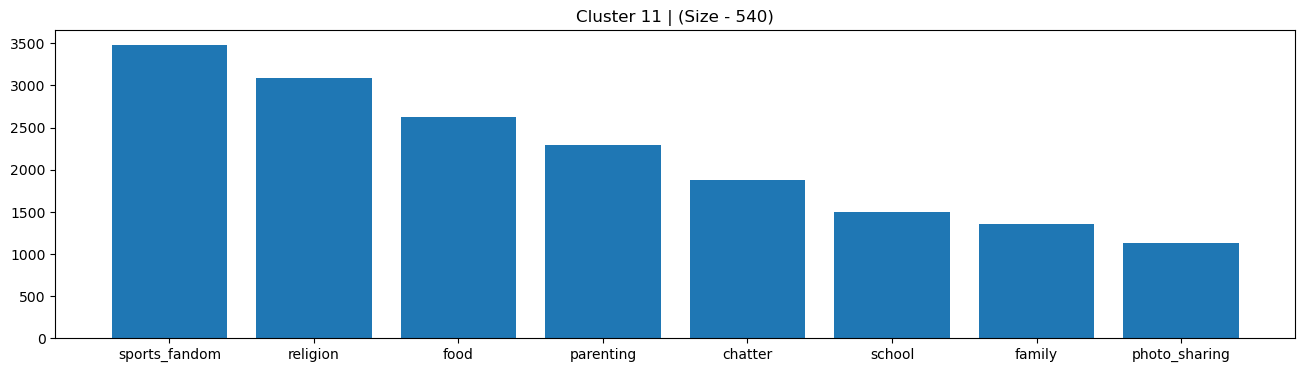

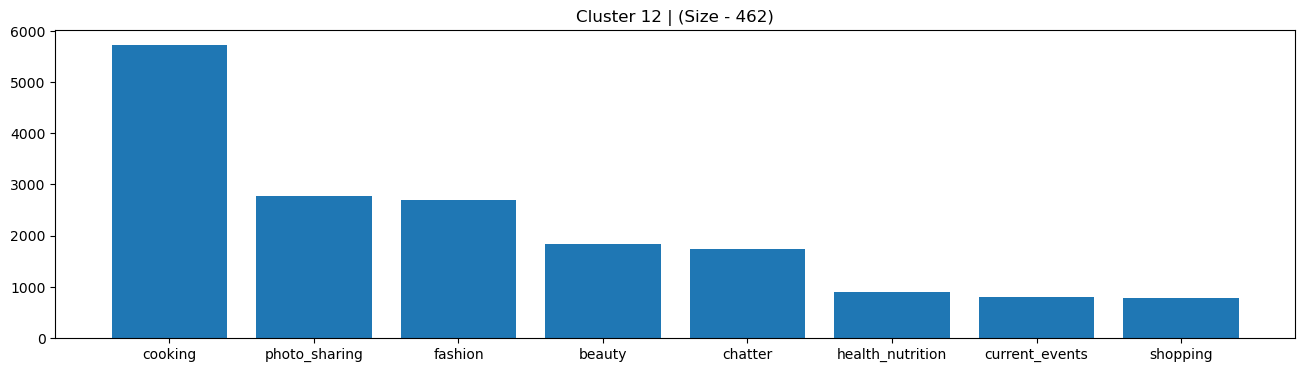

In [75]:
for j in range(0,13):
    data = {}
    for i in df.columns.drop(['Unnamed: 0','clusters']):
        data[i] = df[df['clusters']==j][i].sum()
    data = pd.Series(data).to_frame().reset_index()
    data.columns =['Tweet_Category','#Tweets']
    data.sort_values(by ='#Tweets', ascending= False, inplace= True)
    plt.figure(figsize=(16,4)) 
    plt.bar(data['Tweet_Category'][:8], data['#Tweets'][:8])
    title = "Cluster {} | (Size - {})".format(j,df[df['clusters']==j].shape[0])
    plt.title(title)
    


In [76]:
#df['clusters'].value_counts()

### Clubing clusters with similar properties

In [77]:
# Merging cluster 0 with 1
df['clusters']=df['clusters'].replace(0,1)
# Merging cluster 5 with 1
df['clusters']=df['clusters'].replace(5, 1)
# Merging cluster 7 with 1
df['clusters']=df['clusters'].replace(7, 2)
# Merging cluster 10 with 2
df['clusters']=df['clusters'].replace(10, 2)



In [79]:
# Replacing cluster 12 with 10
df['clusters']=df['clusters'].replace(12, 10)


In [81]:
# Replacing cluster 11 with 5
df['clusters']=df['clusters'].replace(11, 5)

In [83]:
# Replacing cluster 10 with 7
df['clusters']=df['clusters'].replace(10, 7)

In [64]:
df['clusters'].value_counts().sum()

7882

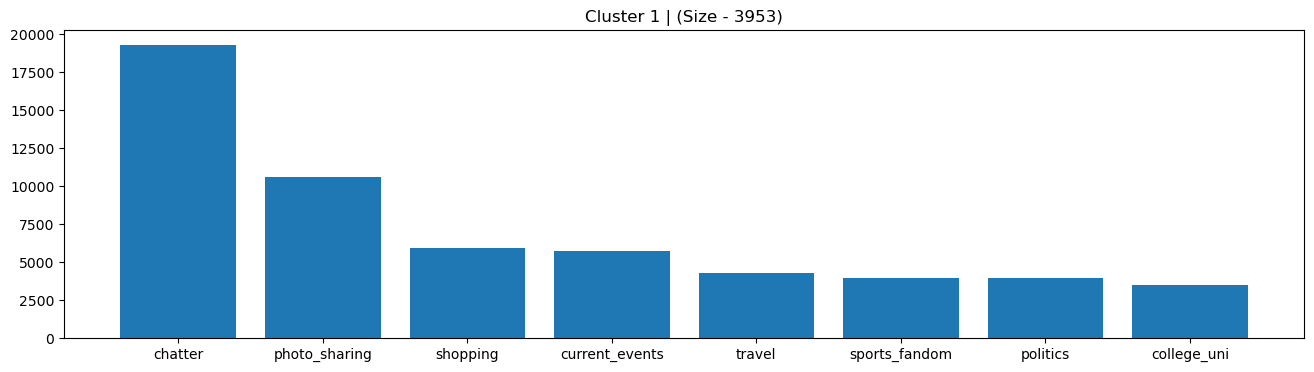

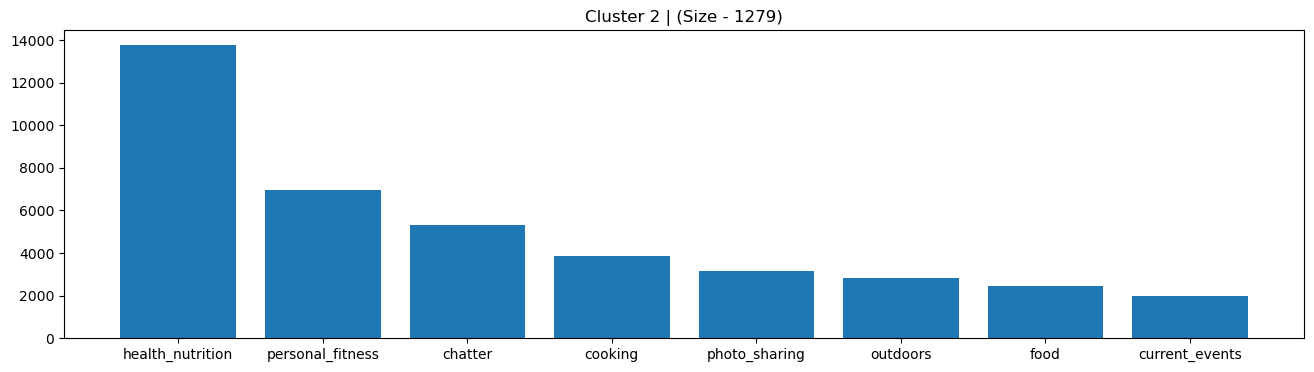

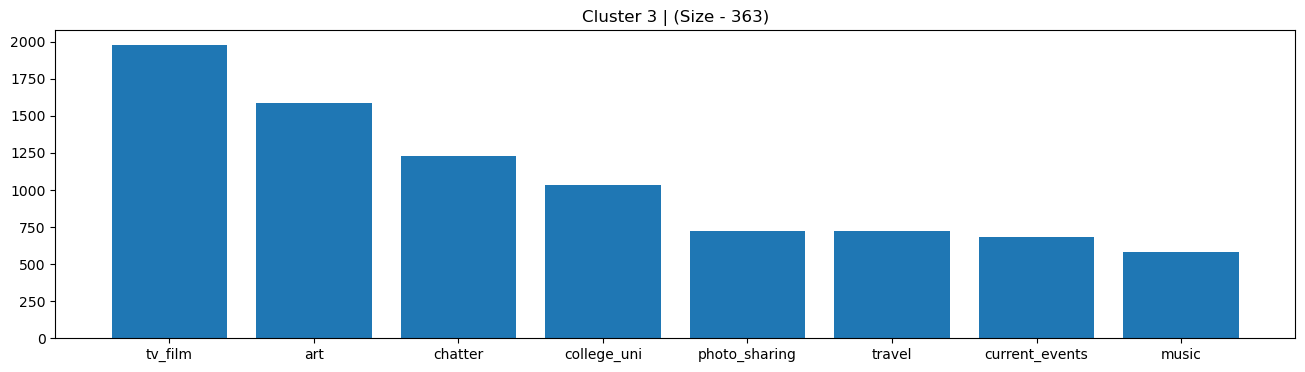

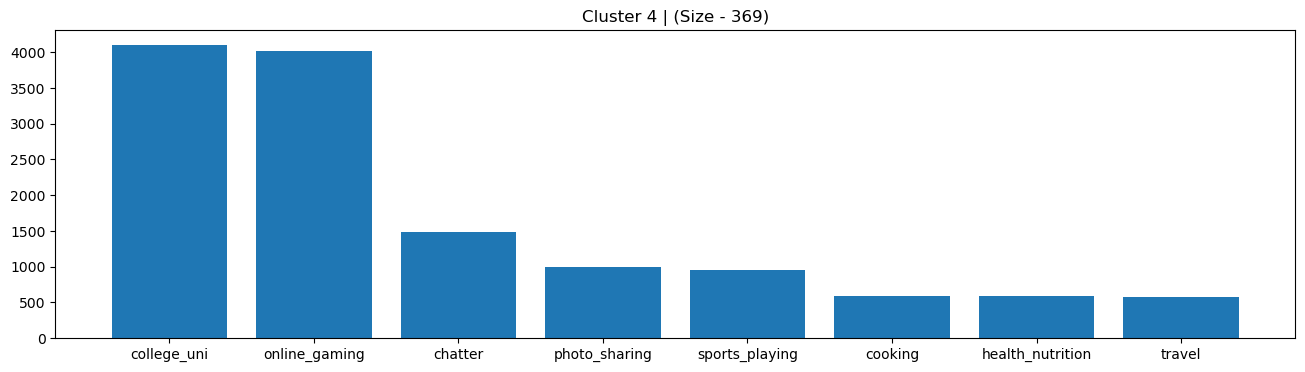

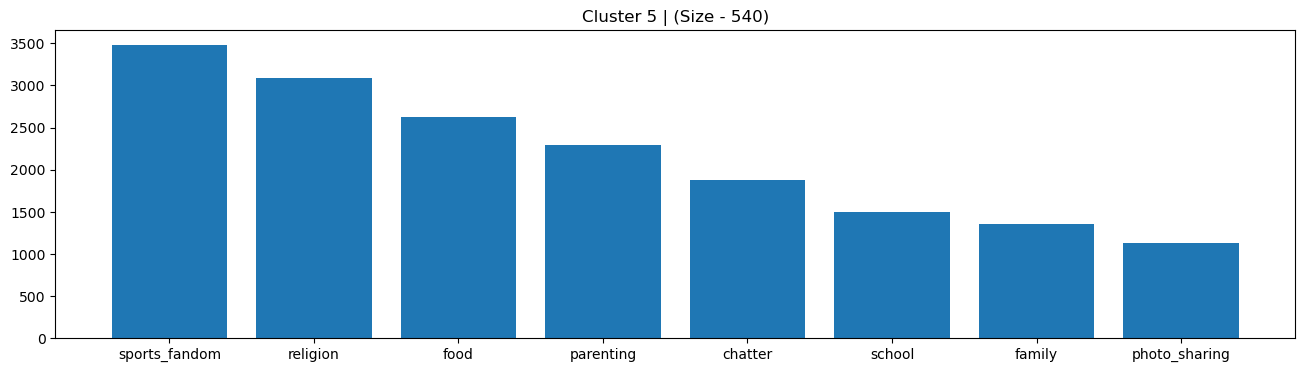

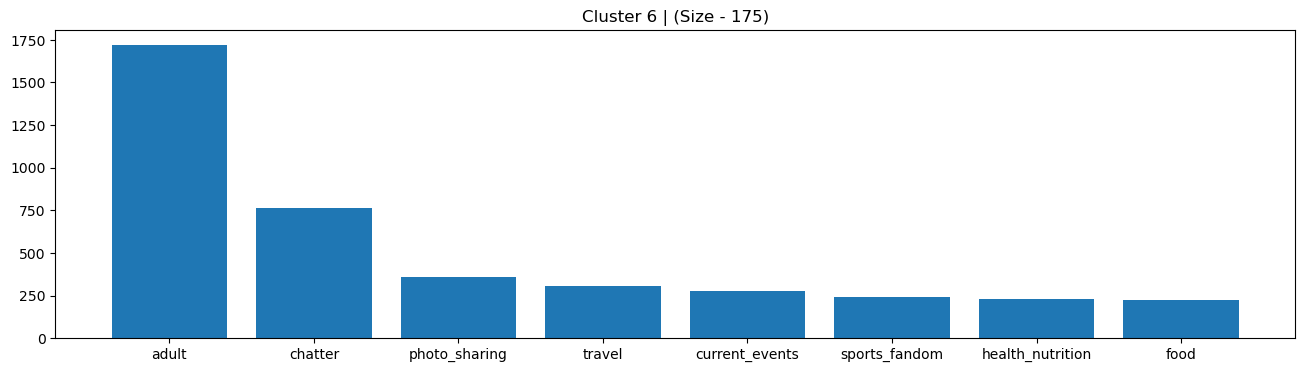

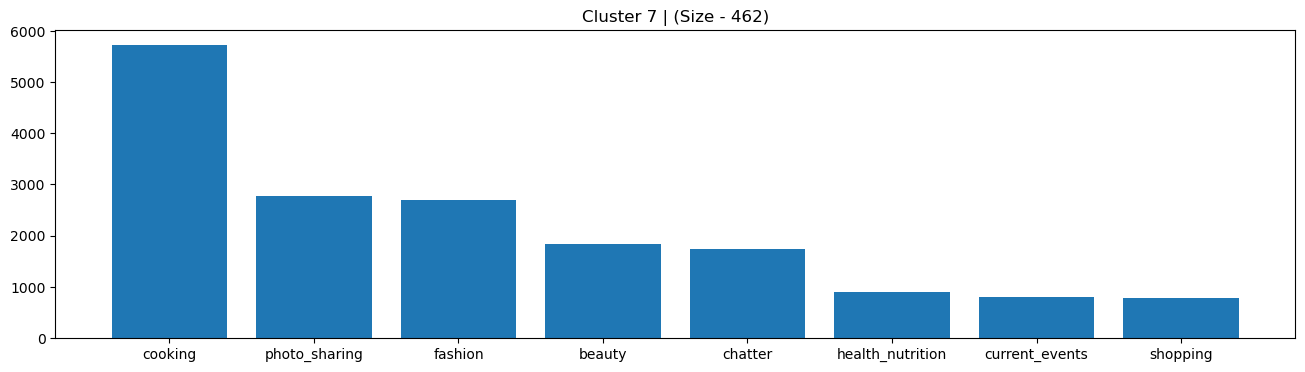

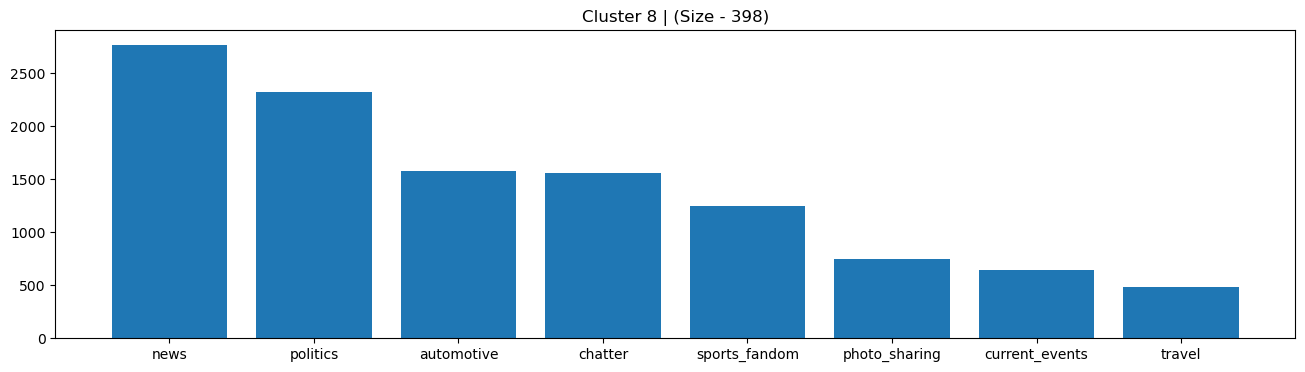

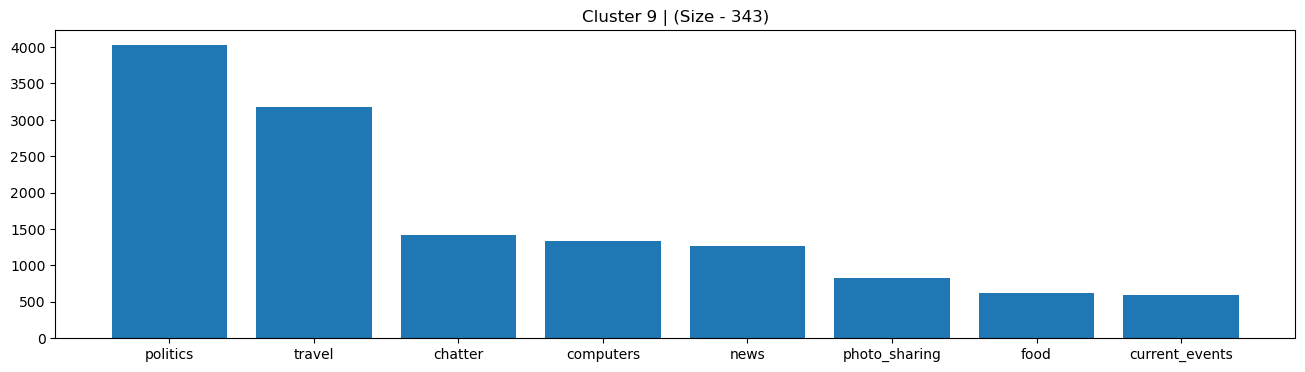

In [85]:
for j in range(1,10):
    data = {}
    for i in df.columns.drop(['Unnamed: 0','clusters']):
        data[i] = df[df['clusters']==j][i].sum()
    data = pd.Series(data).to_frame().reset_index()
    data.columns =['Tweet_Category','#Tweets']
    data.sort_values(by ='#Tweets', ascending= False, inplace= True)
    plt.figure(figsize=(16,4)) 
    plt.bar(data['Tweet_Category'][:8], data['#Tweets'][:8])
    title = "Cluster {} | (Size - {})".format(j,df[df['clusters']==j].shape[0])
    plt.title(title)
    


### Hierarchical Clustering

In [55]:
#Z = linkage(df_X_PCA, method='ward',metric='euclidean')
#plt.figure(figsize=(10, 15))
#dendrogram(Z)
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Sample Index')
#plt.ylabel('Distance')
#plt.show()

hierarchical_cluster = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_X_PCA) 
print(labels)
hierarchical_clusters = pd.DataFrame(labels,columns=["hierarchical_clusters"])
hierarchical_clusters

In [56]:
#df =df.merge(hierarchical_clusters,how="inner",left_index=True, right_index=True)
#df

# Hierarchical Cluster Analysis

In [57]:
#for j in range(0,14):
#    data = {}
#    for i in df.columns.drop(['Unnamed: 0','hierarchical_clusters','clusters']):
#        data[i] = df[df['hierarchical_clusters']==j][i].sum()
#    data = pd.Series(data).to_frame().reset_index()
#    data.columns =['Tweet_Category','#Tweets']
#    data.sort_values(by ='#Tweets', ascending= False, inplace= True)
#    plt.figure(figsize=(16,4)) 
#   plt.bar(data['Tweet_Category'][:8], data['#Tweets'][:8])
#    title = "Hierarchical clusters {} | (Size - {})".format(j,df[df['hierarchical_clusters']==j].shape[0])
#    plt.title(title)
    
